In [ ]:
#Q3.
"""
BANK MARKETING: Predicting Whether The Customer Will Subscribe To Term Deposit (FIXED DEPOSIT) or not.
Business Use Case
There has been a revenue decline for a Portuguese bank and they would like to know what actions to take. After investigation, they found out that the root cause is that their clients are not depositing as frequently as before. Knowing that term deposits allow banks to hold onto a deposit for a specific amount of time, so banks can invest in higher gain financial products to make a profit. In addition, banks also hold better chance to persuade term deposit clients into buying other products such as funds or insurance to further increase their revenues. As a result, the Portuguese bank would like to identify existing clients that have higher chance to subscribe for a term deposit and focus marketing efforts on such clients.

Project Description
Your client is a retail banking institution. Term deposits are a major source of income for a bank. A term deposit is a cash investment held at a financial institution. Your money is invested for an agreed rate of interest over a fixed amount of time, or term. The bank has various outreach plans to sell term deposits to their customers such as email marketing, advertisements, telephonic marketing and digital marketing. Telephonic marketing campaigns still remain one of the most effective way to reach out to people. However, they require huge investment as large call centers are hired to actually execute these campaigns. Hence, it is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted via call.
You are provided with the client data such as : age of the client, their job type, their marital status, etc. Along with the client data, you are also provided with the information of the call such as the duration of the call, day and month of the call, etc. Given this information, your task is to predict if the client will subscribe to term deposit.
About The Dataset
The dataset is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal of this dataset is to predict if the client or the customer of polish banking institution will subscribe a term deposit product of the bank or not. 



You are provided with following 2 files:
1.     train.csv : Use this dataset to train the model. This file contains all the client and call details as well as the target variable “subscribed”. You have to train your model using this file.
2.     test.csv : Use the trained model to predict whether a new set of clients will subscribe the term deposit.
 
Dataset Attributes
Here is the description of all the variables:
•	Variable: Definition
•	ID: Unique client ID
•	age: Age of the client
•	job: Type of job
•	marital: Marital status of the client
•	education: Education level
•	default: Credit in default.
•	housing: Housing loan
•	loan: Personal loan
•	contact: Type of communication
•	month: Contact month
•	day_of_week: Day of week of contact
•	duration: Contact duration
•	campaign: number of contacts performed during this campaign to the client
•	pdays: number of days that passed by after the client was last contacted
•	previous: number of contacts performed before this campaign
•	poutcome: outcome of the previous marketing campaign
Output variable (desired target):
•	Subscribed (target): has the client subscribed a term deposit? (YES/NO)



Dataset Link-
•	https://github.com/dsrscientist/dataset5
•	https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_train.csv
•	https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_test.csv

  """

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV


# Load the dataset
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_train.csv")
df


,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [3]:
# Display the first few rows of the dataset
print(df.head())

      ID  age         job   marital  education default  balance housing loan  \
0  26110   56      admin.   married    unknown      no     1933      no   no   
1  40576   31     unknown   married  secondary      no        3      no   no   
2  15320   27    services   married  secondary      no      891     yes   no   
3  43962   57  management  divorced   tertiary      no     3287      no   no   
4  29842   31  technician   married  secondary      no      119     yes   no   

     contact  day month  duration  campaign  pdays  previous poutcome  \
0  telephone   19   nov        44         2     -1         0  unknown   
1   cellular   20   jul        91         2     -1         0  unknown   
2   cellular   18   jul       240         1     -1         0  unknown   
3   cellular   22   jun       867         1     84         3  success   
4   cellular    4   feb       380         1     -1         0  unknown   

  subscribed  
0         no  
1         no  
2         no  
3        yes  
4    

In [4]:
df.shape # to check the dimension of the data set (rows, columns)

(31647, 18)

In [5]:
df.dtypes #Checking the types of columns

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

In [6]:
#checking the null Values
df.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

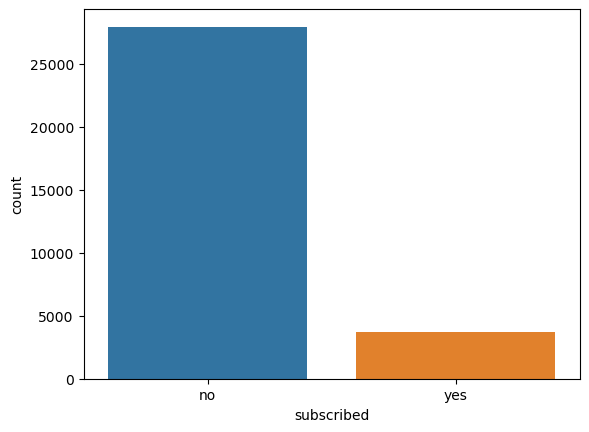

In [8]:
# Check the distribution of the target variable
sns.countplot(x='subscribed', data=df)
plt.show()

In [ ]:
''''Some machine learning algorithms have parameters or techniques specifically designed to handle imbalanced data.   
Eg.: in scikit-learn's RandomForestClassifier, we can use the class_weight parameter to assign different weights to classes.
''''

In [9]:
df.info() #detailed information about the data frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [16]:
# Drop irrelevant columns 
df = df.drop(['ID'], axis=1)


In [17]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [18]:
# Encode categorical variables using Label Encoding
label_encoder = LabelEncoder()
categorical_columns = df.select_dtypes(include=['object']).columns

for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

In [19]:
#Again checking the types of columns
df.dtypes 

age           int64
job           int32
marital       int32
education     int32
default       int32
balance       int64
housing       int32
loan          int32
contact       int32
day           int64
month         int32
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome      int32
subscribed    int32
dtype: object

In [20]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,0,1,3,0,1933,0,0,1,19,9,44,2,-1,0,3,0
1,31,11,1,1,0,3,0,0,0,20,5,91,2,-1,0,3,0
2,27,7,1,1,0,891,1,0,0,18,5,240,1,-1,0,3,0
3,57,4,0,2,0,3287,0,0,0,22,6,867,1,84,3,2,1
4,31,9,1,1,0,119,1,0,0,4,3,380,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,29,4,2,2,0,0,1,0,0,12,8,116,2,-1,0,3,0
31643,53,4,0,2,0,380,0,1,0,5,6,438,2,-1,0,3,1
31644,32,4,2,2,0,312,0,0,0,7,1,37,3,-1,0,3,0
31645,57,9,1,1,0,225,1,0,1,15,8,22,7,337,12,0,0


In [21]:
#checking the value count of each column
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

32    1457
31    1417
33    1406
34    1321
35    1314
      ... 
92       1
95       1
93       1
94       1
90       1
Name: age, Length: 76, dtype: int64


1     6842
4     6639
9     5307
0     3631
7     2903
5     1574
6     1123
2     1008
10     905
3      874
8      635
11     206
Name: job, dtype: int64


1    19095
2     8922
0     3630
Name: marital, dtype: int64


1    16224
2     9301
0     4808
3     1314
Name: education, dtype: int64


0    31062
1      585
Name: default, dtype: int64


 0        2470
 1         137
 2         109
 4          95
 3          88
          ... 
 15120       1
-713         1
-905         1
 4722        1
 2968        1
Name: balance, Length: 6326, dtype: int64


1    17584
0    14063
Name: housing, dtype: int64


0    26516
1     5131
Name: loan, dtype: int64


0    20423
2     9177
1     2047
Name: contact, dtype: int64


20    1909
18    1612
21    1445
5     1373
6     1348
17    1344
14    1283
8     1281
28    1276
29    1241
7     124

In [22]:
#checking number of unique value in each column
df.nunique().to_frame('no. of unique values')

,no. of unique values
age,76
job,12
marital,3
education,4
default,2
balance,6326
housing,2
loan,2
contact,3
day,31


In [23]:
# Split the dataset into features (x) and target variable (y)
x = df.drop(['subscribed'], axis=1)
y = df['subscribed']

In [24]:
# Finding the best random state

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

maxAccu = 0
maxRS = 0

for i in range(1, 200):
    # Split the dataset into training and testing sets
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=i)
    
    # Initialize RandomForestClassifier
    RFR = RandomForestClassifier()
    
    # Train the model
    RFR.fit(x_train, y_train)
    
    # Make predictions
    pred = RFR.predict(x_test)
    
    # Calculate accuracy
    acc = accuracy_score(y_test, pred)
    
    # Update max accuracy and corresponding random state if the current accuracy is higher
    if acc > maxAccu:
        maxAccu = acc
        maxRS = i

print("Best accuracy is", maxAccu, "at random_state", maxRS)


Best accuracy is 0.9121642969984203 at random_state 154


In [ ]:
#creating train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state= i)


In [42]:
#Classification algorithms
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score


In [26]:
#Checking accuracy for RandomForestClassifier

# Initialize the RandomForestClassifier
RFC = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=i)  ## Class weights can be automatically calculated by using 'balanced'.
                                                                                         #Techniques designed to handle imbalanced data in target variable
# Train the model on the training set
RFC.fit(x_train, y_train)
# Make predictions on the testing set
predRFC= RFC.predict(x_test)

print('Accuracy:', accuracy_score(y_test ,predRFC))
print('\nConfusion Matrix:\n',confusion_matrix(y_test ,predRFC))
print('\nClassification Report:\n',classification_report(y_test ,predRFC))

Accuracy: 0.9055292259083728

Confusion Matrix:
 [[8216  170]
 [ 727  382]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95      8386
           1       0.69      0.34      0.46      1109

    accuracy                           0.91      9495
   macro avg       0.81      0.66      0.70      9495
weighted avg       0.89      0.91      0.89      9495



In [27]:
#Checking accuracy for LogisticRegression

# Initialize the LogisticRegression
LR = LogisticRegression()

# Train the model on the training set
LR.fit(x_train, y_train)
# Make predictions on the testing set
predLR= LR.predict(x_test)

print('Accuracy:', accuracy_score(y_test ,predLR))
print('\nConfusion Matrix:\n',confusion_matrix(y_test ,predLR))
print('\nClassification Report:\n',classification_report(y_test ,predLR))

Accuracy: 0.8858346498156925

Confusion Matrix:
 [[8228  158]
 [ 926  183]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94      8386
           1       0.54      0.17      0.25      1109

    accuracy                           0.89      9495
   macro avg       0.72      0.57      0.60      9495
weighted avg       0.86      0.89      0.86      9495



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
#Checking accuracy for support vector machine classifier

# Initialize the SVC
svc = SVC()

# Train the model on the training set
svc.fit(x_train, y_train)
# Make predictions on the testing set
predsvc= svc.predict(x_test)

print('Accuracy:', accuracy_score(y_test ,predsvc))
print('\nConfusion Matrix:\n',confusion_matrix(y_test ,predsvc))
print('\nClassification Report:\n',classification_report(y_test ,predsvc))

Accuracy: 0.8832016850974197

Confusion Matrix:
 [[8382    4]
 [1105    4]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.94      8386
           1       0.50      0.00      0.01      1109

    accuracy                           0.88      9495
   macro avg       0.69      0.50      0.47      9495
weighted avg       0.84      0.88      0.83      9495



In [29]:
#Checking accuracy for Gradient Boosting classifier

# Initialize the Gradient Boosting classifier
GB = GradientBoostingClassifier()

# Train the model on the training set
GB.fit(x_train, y_train)
# Make predictions on the testing set
predGB= GB.predict(x_test)

print('Accuracy:', accuracy_score(y_test ,predGB))
print('\nConfusion Matrix:\n',confusion_matrix(y_test ,predGB))
print('\nClassification Report:\n',classification_report(y_test ,predGB))

Accuracy: 0.9031068983675619

Confusion Matrix:
 [[8163  223]
 [ 697  412]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.95      8386
           1       0.65      0.37      0.47      1109

    accuracy                           0.90      9495
   macro avg       0.79      0.67      0.71      9495
weighted avg       0.89      0.90      0.89      9495



In [30]:
#Checking accuracy for AdaBoost classifier

# Initialize the AdaBoost classifier 
ABC = AdaBoostClassifier()

# Train the model on the training set
ABC.fit(x_train, y_train)
# Make predictions on the testing set
predABC= ABC.predict(x_test)

print('Accuracy:', accuracy_score(y_test ,predABC))
print('\nConfusion Matrix:\n',confusion_matrix(y_test ,predABC))
print('\nClassification Report:\n',classification_report(y_test ,predABC))

Accuracy: 0.8971037388098999

Confusion Matrix:
 [[8125  261]
 [ 716  393]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94      8386
           1       0.60      0.35      0.45      1109

    accuracy                           0.90      9495
   macro avg       0.76      0.66      0.69      9495
weighted avg       0.88      0.90      0.89      9495



In [31]:
#Checking accuracy for ExtraTreesClassifier

# Initialize the ExtraTreesClassifier  
ET = ExtraTreesClassifier()

# Train the model on the training set
ET.fit(x_train, y_train)
# Make predictions on the testing set
predET= ET.predict(x_test)

print('Accuracy:', accuracy_score(y_test ,predET))
print('\nConfusion Matrix:\n',confusion_matrix(y_test ,predET))
print('\nClassification Report:\n',classification_report(y_test ,predET))

Accuracy: 0.906477093206951

Confusion Matrix:
 [[8212  174]
 [ 714  395]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95      8386
           1       0.69      0.36      0.47      1109

    accuracy                           0.91      9495
   macro avg       0.81      0.67      0.71      9495
weighted avg       0.89      0.91      0.89      9495



In [32]:
#Checking accuracy for BaggingClassifier

# Initialize the BaggingClassifier  
BC = BaggingClassifier()

# Train the model on the training set
BC.fit(x_train, y_train)
# Make predictions on the testing set
predBC= BC.predict(x_test)

print('Accuracy:', accuracy_score(y_test ,predBC))
print('\nConfusion Matrix:\n',confusion_matrix(y_test ,predBC))
print('\nClassification Report:\n',classification_report(y_test ,predBC))

Accuracy: 0.8966824644549763

Confusion Matrix:
 [[8078  308]
 [ 673  436]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94      8386
           1       0.59      0.39      0.47      1109

    accuracy                           0.90      9495
   macro avg       0.75      0.68      0.71      9495
weighted avg       0.88      0.90      0.89      9495



In [ ]:
#Cross Validation Score
""""cv=5------its a fold value  1, 2, 3, 4 , 5 
cross_val_score(modelname, features, targetvariable, cv=foldvalue, scoring= 'accuracy')   

[cv=5 foldvalue, means my data will be divided into 5 equal parts & each part will fold randomly selected data, (n-1) will be selected for the Training purpose and the remaining one will be used for the Test purpose]

NOTE: In classification algorithms- default scoring parameter- accuracy
      for regression- default scoring parameter is- r2 score """
        

In [33]:
#Checking cv score for Random Forest Classification *
score= cross_val_score(RFC,x,y)
print('score:',score)
print('\n mean:',score.mean())
print('\n difference between Accuracy score and Cross validation score is :', accuracy_score(y_test, predRFC) - score.mean())

score: [0.90157978 0.90221169 0.9001422  0.90251225 0.90156423]

 mean: 0.901602029026096

 difference between Accuracy score and Cross validation score is : 0.003927196882276829


In [34]:
#Checking cv score for LogisticRegression
score= cross_val_score(LR,x,y)
print('score:',score)
print('\n mean:',score.mean())
print('\n difference between Accuracy score and Cross validation score is :', accuracy_score(y_test, predLR) - score.mean())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

score: [0.89004739 0.8906793  0.88197188 0.88750198 0.88592195]

 mean: 0.8872244990773183

 difference between Accuracy score and Cross validation score is : -0.0013898492616257752


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [35]:
#Checking cv score for SVC
score= cross_val_score(svc,x,y)
print('score:',score)
print('\n mean:',score.mean())
print('\n difference between Accuracy score and Cross validation score is :', accuracy_score(y_test, predsvc) - score.mean())

score: [0.88309637 0.88262243 0.88212988 0.88260389 0.88291989]

 mean: 0.8826744914267858

 difference between Accuracy score and Cross validation score is : 0.0005271936706339186


In [36]:
#Checking cv score for Gradient Boosting classifier
score= cross_val_score(GB,x,y)
print('score:',score)
print('\n mean:',score.mean())
print('\n difference between Accuracy score and Cross validation score is :', accuracy_score(y_test, predGB) - score.mean())

score: [0.9056872  0.90410742 0.90188023 0.90282825 0.90203824]

 mean: 0.903308270038592

 difference between Accuracy score and Cross validation score is : -0.0002013716710301816


In [37]:
#Checking cv score for AdaBoost classifier 
score= cross_val_score(ABC,x,y)
print('score:',score)
print('\n mean:',score.mean())
print('\n difference between Accuracy score and Cross validation score is :', accuracy_score(y_test, predABC) - score.mean())

score: [0.89383886 0.89826224 0.89208406 0.89729815 0.89619213]

 mean: 0.8955350892366616

 difference between Accuracy score and Cross validation score is : 0.0015686495732383232


In [38]:
#Checking cv score for ExtraTreesClassifier  
score= cross_val_score(ET,x,y)
print('score:',score)
print('\n mean:',score.mean())
print('\n difference between Accuracy score and Cross validation score is :', accuracy_score(y_test, predET) - score.mean())

score: [0.90410742 0.90268562 0.89872018 0.90061621 0.8999842 ]

 mean: 0.9012227273487448

 difference between Accuracy score and Cross validation score is : 0.005254365858206267


In [39]:
#Checking cv score for BaggingClassifier  
score= cross_val_score(BC,x,y)
print('score:',score)
print('\n mean:',score.mean())
print('\n difference between Accuracy score and Cross validation score is :', accuracy_score(y_test, predBC) - score.mean())

score: [0.89557662 0.89842022 0.89398009 0.89840417 0.89935219]

 mean: 0.8971466583396921

 difference between Accuracy score and Cross validation score is : -0.00046419388471574674


In [44]:

# Hyperparameter tuning using GridSearchCV
# Define the parameter grid for BaggingClassifier
param_grid_bagging = {
    'n_estimators': [50, 100, 200],
    'max_samples': [1.0, 0.8, 0.6],
    'max_features': [1.0, 0.8, 0.6],
    'bootstrap': [True, False],
    'bootstrap_features': [True, False],
}

In [45]:
# Initialize BaggingClassifier
bagging_classifier = BaggingClassifier(base_estimator=None, random_state=i)


In [48]:
# Initialize GridSearchCV for BaggingClassifier
grid_search_bagging = GridSearchCV(bagging_classifier, param_grid_bagging, cv=5, scoring='accuracy', n_jobs=-1)


In [49]:
grid_search_bagging.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=BaggingClassifier(random_state=199), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'bootstrap_features': [True, False],
                         'max_features': [1.0, 0.8, 0.6],
                         'max_samples': [1.0, 0.8, 0.6],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [50]:
# Get the best BaggingClassifier model
grid_search_bagging.best_estimator_


BaggingClassifier(max_samples=0.8, n_estimators=200, random_state=199)

In [51]:
# Make predictions on the test set with the best model
y_pred_bagging_best = grid_search_bagging.best_estimator_.predict(x_test)

In [52]:
# Print evaluation metrics for the best BaggingClassifier model
print("\nBest BaggingClassifier Model - Accuracy:", accuracy_score(y_test, y_pred_bagging_best))
print("\nBest BaggingClassifier Model - Confusion Matrix:\n", confusion_matrix(y_test, y_pred_bagging_best))
print("\nBest BaggingClassifier Model - Classification Report:\n", classification_report(y_test, y_pred_bagging_best))


Best BaggingClassifier Model - Accuracy: 0.9057398630858347

Best BaggingClassifier Model - Confusion Matrix:
 [[8076  310]
 [ 585  524]]

Best BaggingClassifier Model - Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.95      8386
           1       0.63      0.47      0.54      1109

    accuracy                           0.91      9495
   macro avg       0.78      0.72      0.74      9495
weighted avg       0.90      0.91      0.90      9495



In [ ]:
# NOW FOR Load and Preprocess the Test Dataset

In [54]:
# Load the test dataset
test_df =pd.read_csv ("https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_test.csv")
test_df



,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success


In [66]:
# Drop irrelevant columns 
test_df = test_df.drop(['ID'], axis=1)

KeyError: "['ID'] not found in axis"

In [72]:
# Encode categorical variables using Label Encoding
label_encoder = LabelEncoder()
categorical_columns = test_df.select_dtypes(include=['object']).columns

for col in categorical_columns:
    test_df[col] = label_encoder.transform(test_df[col])
    





In [73]:
test_df.dtypes 

age          int64
job          int64
marital      int64
education    int64
default      int64
balance      int64
housing      int64
loan         int64
contact      int64
day          int64
month        int64
duration     int64
campaign     int64
pdays        int64
previous     int64
poutcome     int64
dtype: object

In [74]:
# Ensure that the test set has the same columns as the training set
test_df = test_df[x.columns]

In [77]:
# Make predictions on the test set using the trained BaggingClassifier
test_predictions = grid_search_bagging.best_estimator_.predict(test_df)


In [78]:
# Add predictions to the test dataset
test_df['Predicted_Subscription'] = test_predictions

In [81]:
# Display the final test dataset with predictions
print(test_df.head(20))

    age  job  marital  education  default  balance  housing  loan  contact  \
0    32    0        0          0        0      118        0     0        0   
1    78    0        0          0        0     2787        0     0        0   
2    31    0        0          0        0      144        0     0        0   
3    57    0        0          0        0     3777        0     0        0   
4    45    0        0          0        0     -705        0     0        0   
5    32    0        0          0        0        0        0     0        0   
6    33    0        0          0        0      307        0     0        0   
7    37    0        0          0        0      341        0     0        0   
8    36    0        0          0        0     1381        0     0        0   
9    50    0        0          0        0      181        0     0        0   
10   34    0        0          0        0      654        0     0        0   
11   33    0        0          0        0      188        0     

In [80]:
test_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Predicted_Subscription
0,32,0,0,0,0,118,0,0,0,15,0,20,6,-1,0,0,0
1,78,0,0,0,0,2787,0,0,0,1,0,372,1,-1,0,0,0
2,31,0,0,0,0,144,0,0,0,16,0,676,1,-1,0,0,1
3,57,0,0,0,0,3777,0,0,0,13,0,65,2,-1,0,0,0
4,45,0,0,0,0,-705,0,0,0,3,0,111,1,-1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,39,0,0,0,0,45,0,0,0,28,0,148,4,-1,0,0,0
13560,54,0,0,0,0,2281,0,0,0,20,0,158,1,-1,0,0,0
13561,35,0,0,0,0,285,0,0,0,29,0,136,1,-1,0,0,0
13562,29,0,0,0,0,464,0,0,0,9,0,208,2,91,3,0,0
